In [1]:
import IPython.display as ipd
from librosa.display import specshow
import numpy as np
from matplotlib import pyplot as plt

from autoencoder import VAE
from preprocess import MinMaxNormaliser
from settings import SAMPLE_RATE, HOP_LENGTH
from soundgenerator import SoundGenerator
from train import load_dataset

num_samples = 20
show = False
play = True

vae = VAE.load("model_220609")
original_specs, _ = load_dataset(num_samples=num_samples)
reconstructed_specs = vae.model.predict(original_specs)

original_specs = MinMaxNormaliser.denormalise(original_specs)
reconstructed_specs = MinMaxNormaliser.denormalise(reconstructed_specs)

C:\Users\ramra\AppData\Roaming\Python\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ramra\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ramra\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


Loaded VAE from C:\Users\ramra\PycharmProjects\OneShotOneShot\code\..\logs\model_220609
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [2]:
def pretty_plot_spectrogram(spectrogram: np.ndarray, title: str):
    fig, ax = plt.subplots()
    # wave_img = librosa.display.waveplot(x, sr=sr)
    spec_img = specshow(spectrogram[..., 0], x_axis='time', y_axis='linear', ax=ax)
    ax.set(title=title)
    ax.set_xlim(0., 1.)

    fig.colorbar(spec_img, ax=ax, format="%+2.f dB")
    plt.show()

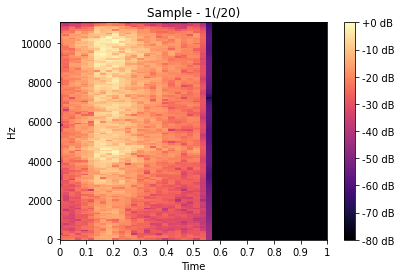

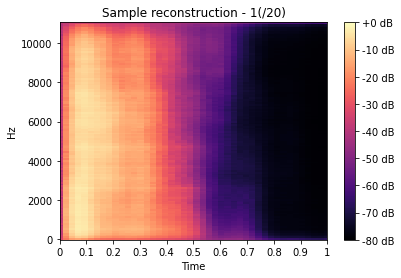

ValueError: Array audio input must be a 1D or 2D array

In [3]:
original_audio =  SoundGenerator(None, HOP_LENGTH).convert_spectrograms_to_audio(original_specs[..., 0])
reconstructed_audio =  SoundGenerator(None, HOP_LENGTH).convert_spectrograms_to_audio(reconstructed_specs[..., 0])
for i in range(num_samples):
    pretty_plot_spectrogram(original_specs[i], f"Sample - {i + 1}(/{num_samples})")
    pretty_plot_spectrogram(reconstructed_specs[i], f"Sample reconstruction - {i + 1}(/{num_samples})")
    ipd.Audio(original_audio[i], rate=SAMPLE_RATE)
    ipd.Audio(reconstructed_audio[i], rate=SAMPLE_RATE)
